# Spatial_proteomic_P9

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
import BINARY

In [4]:
import pysodb
sodb = pysodb.SODB()

In [5]:
dataset_name = 'keren2018a'
experiment_name = 'p9'
adata_raw = sodb.load_experiment(dataset_name,experiment_name)

load experiment[p9] in dataset[keren2018a]


In [6]:
adata_raw

AnnData object with n_obs × n_vars = 6139 × 36
    obs: 'SampleID', 'cellLabelInImage', 'cellSize', 'C', 'Na', 'Si', 'P', 'Ca', 'Fe', 'Background', 'B7H3', 'OX40', 'CD163', 'CSF-1R', 'Ta', 'Au', 'tumorYN', 'tumorCluster', 'Group', 'immuneCluster', 'immuneGroup', 'group_name', 'immuneGroup_name', 'all_group_name', 'leiden'
    uns: 'all_group_name_colors', 'group_name_colors', 'immuneGroup_name_colors', 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
adata = BINARY.clean_adata(adata_raw)

In [8]:
adata 

AnnData object with n_obs × n_vars = 6139 × 36
    obsm: 'spatial'

In [9]:
adata = BINARY.Count2Binary(adata)

In [10]:
adata

AnnData object with n_obs × n_vars = 6139 × 36
    obsm: 'spatial'

In [11]:
BINARY.Construct_Spatial_Graph(adata, 
                                use_method='KNN', 
                                cutoff=15)

------Constructing spatial graph...------
The graph contains 92085 edges, 6139 cells.
15.0000 neighbors per cell on average.


In [12]:
adata = BINARY.train_BINARY(adata, pos_weight= 10, device= 'cuda:0')

Size of Input:  (6139, 36)


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 118.09it/s]


In [13]:
sc.pp.neighbors(adata, use_rep='BINARY')
sc.tl.umap(adata)

In [14]:
adata = BINARY.mclust_R(adata, used_obsm='BINARY', num_cluster=2)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


(-68.51836257309944, 2115.868070175439, -68.54890625, 2116.3936979166665)

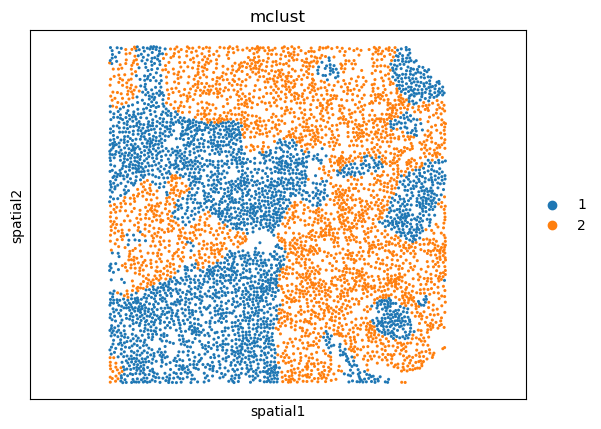

In [15]:
ax = sc.pl.embedding(adata, basis='spatial', color=["mclust"], show=False)
ax.axis('equal')